# 1. Linear Support Vector Machine
The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear Support vector machine works on the data set for varying values of C (similar to the regularization term in linear/logistic regression). Let's load the data.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

raw_data = loadmat('ex6data1.mat')

We'll visualize it as a scatter plot where the class label is denoted by a symbol ('+' for positive, 'o' for negative).

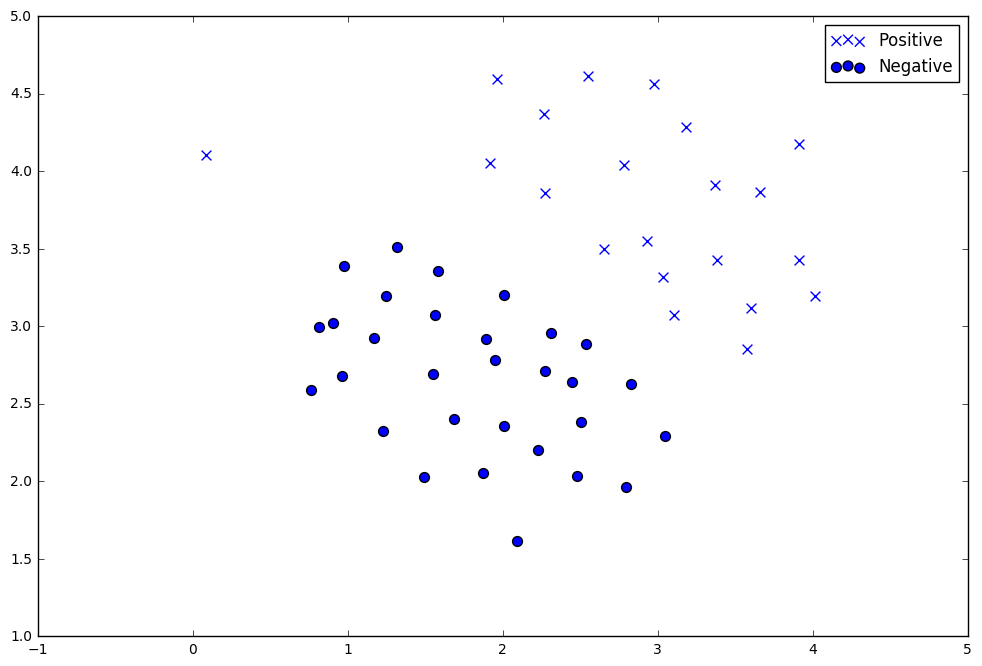

In [2]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()  

Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. Use scikit-learn LinearSVC to linearly classify the dataset. Use regularized SVM, although we have not yet studied regularized svm. In svm the regularization is controled by the parameter C. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression. Classify the training examples with C=1 and C=100. Plot the decision boundary (or the confidence level (distance from boundary)). Explain what you observe.

In [6]:
from sklearn import svm 
#TODO: use LinearSVC to linearly classify
# use loss='hinge', max_iter=1000, and C=[1,100] in call to LinearSCV


# 2 Non-linear Support Vector Machine

Now we're going to move from a linear SVM to one that's capable of non-linear classification. Lets visualize the data first.

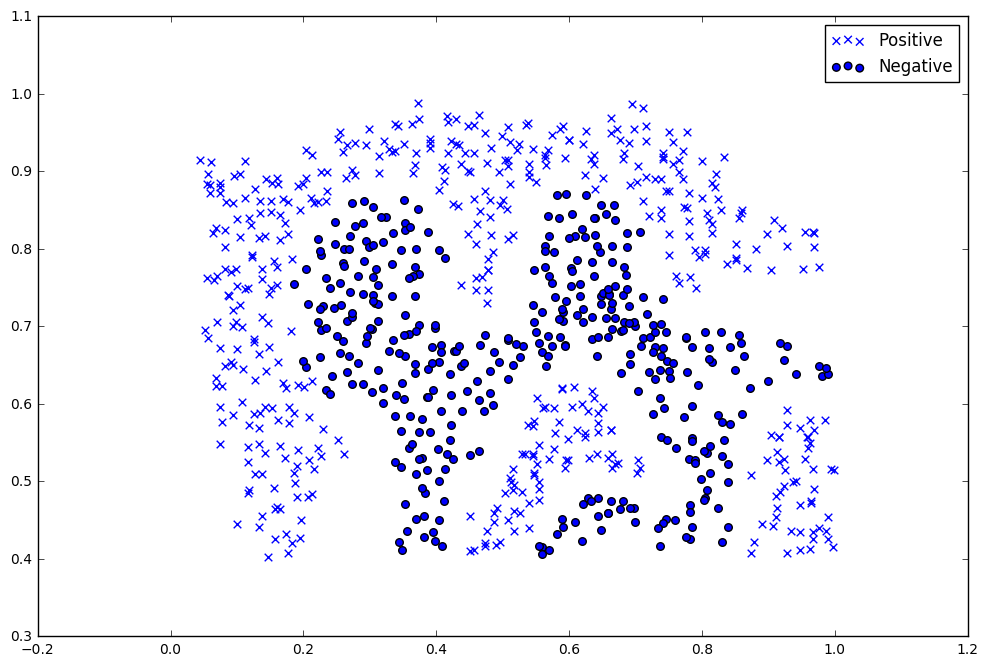

In [4]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()  


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data. To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label. We'll see from the result that it gets most of them right. There are two hyperparamters C and gamma. In the next part of the lab you are required to find the optimal hyperparamters based on the validation set performance.

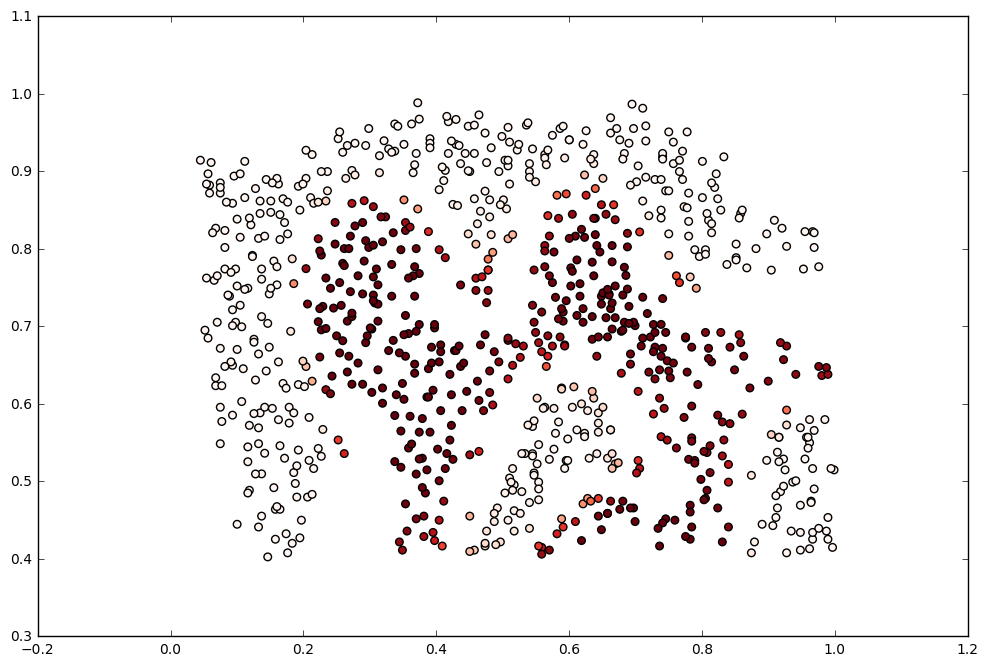

In [26]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
svc.score(data[['X1', 'X2']], data['y'])  

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

Find the optimal hyperparameters C and gamma, for the validation dataset [Xval, yval], by trying out various values of the parameters (grid-search). The optimal parameters are those that give the max svc.score

In [5]:
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

#TODO find optimal hyperparatmers 
